In [63]:
print("Machine Downtime Optimisation Project")

 Machine Downtime Optimisation Project


In [64]:
import pandas as pd
import numpy as np

In [65]:
df = pd.read_csv(r"C:\Users\Rahul\Desktop\data anylist\internship Project\Machine Downtime dataset\Machine Downtime.csv")

In [66]:
df

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,1/2/2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,1/2/2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


In [67]:
columns = df.columns

columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [68]:
df.head(10)

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
5,31-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,137.370000,5.918357,7.228066,5.4,48.0,32.7,0.903,25.597,27613.0,319.0,25.521330,3.55,Machine_Failure
6,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,135.930000,6.560332,6.710999,19.3,48.8,37.4,1.240,32.138,26605.0,438.0,25.454652,3.58,Machine_Failure
7,31-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,127.715164,5.060709,6.002229,20.8,45.8,37.5,1.125,19.823,14266.0,334.0,34.973004,2.02,No_Machine_Failure
8,31-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,123.618456,5.074380,6.039524,4.5,51.5,32.1,0.690,16.972,20413.0,278.0,32.519299,2.88,No_Machine_Failure
9,31-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,134.020000,5.567857,6.733096,14.0,47.9,35.2,0.748,36.601,20504.0,379.0,25.618567,3.93,Machine_Failure


In [77]:
def find_outliers_iqr(column_data):

  Q1 = column_data.quantile(0.25)
  Q3 = column_data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[column_data.name] < lower_bound) | (df[column_data.name] > upper_bound)]

# Example for 'Hydraulic_Pressure(bar)'
outliers_pressure = find_outliers_iqr(df['Coolant_Pressure(bar)'])  # Pass the column data
print(outliers_pressure.shape)  # Number of outliers
outliers_pressure


(3, 16)


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
851,20-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,140.916843,11.350,6.315380,5.7,49.3,30.4,1.468,26.444,15217.0,351.0,18.901770,1.87,No_Machine_Failure
853,20-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,112.341994,11.300,6.563934,34.1,44.2,38.9,1.407,32.362,25156.0,324.0,18.977659,2.01,No_Machine_Failure
913,19-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,74.890000,0.325,6.188361,22.0,50.0,24.1,0.923,31.222,21951.0,326.0,28.152023,2.41,Machine_Failure


In [85]:
numerical_columns = ['Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)']

numerical_columns


['Hydraulic_Pressure(bar)',
 'Coolant_Pressure(bar)',
 'Air_System_Pressure(bar)',
 'Coolant_Temperature',
 'Hydraulic_Oil_Temperature(°C)',
 'Spindle_Bearing_Temperature(°C)',
 'Spindle_Vibration(µm)',
 'Tool_Vibration(µm)',
 'Spindle_Speed(RPM)',
 'Voltage(volts)',
 'Torque(Nm)',
 'Cutting(kN)']

In [92]:
outlier_df = {}



for col in numerical_columns:
  outlier_df[col] = find_outliers_iqr(df[col])

outlier_df

{'Hydraulic_Pressure(bar)':           Date            Machine_ID Assembly_Line_No  \
 2058  6/2/2022  Makino-L3-Unit1-2015     Shopfloor-L3   
 
       Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
 2058               -14.326454               5.067261   
 
       Air_System_Pressure(bar)  Coolant_Temperature  \
 2058                  6.163999                  6.8   
 
       Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  \
 2058                           49.6                             39.2   
 
       Spindle_Vibration(µm)  Tool_Vibration(µm)  Spindle_Speed(RPM)  \
 2058                  1.627              17.723             20386.0   
 
       Voltage(volts)  Torque(Nm)  Cutting(kN)            Downtime  
 2058           348.0   33.923365         2.73  No_Machine_Failure  ,
 'Coolant_Pressure(bar)':            Date            Machine_ID Assembly_Line_No  \
 851  20-03-2022  Makino-L3-Unit1-2015     Shopfloor-L3   
 853  20-03-2022  Makino-L2-Unit1-2015     Shopfl

In [104]:
outlier_df.keys()

# Assuming outlier_dfs is the dictionary containing outlier DataFrames

total_outliers = 0
for df in outlier_df.values():
  if df is not None:
    total_outliers += df.shape[0]  # Add number of rows (outlier data points)

print(f"Total number of outliers across all DataFrames: {total_outliers}")


Total number of outliers across all DataFrames: 112


In [36]:
df

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,1/2/2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,1/2/2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


In [37]:
df.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


In [38]:
missing_values = df.isnull().sum()

missing_values

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [39]:
df = df.dropna()

df

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,1/2/2022,Makino-L2-Unit1-2015,Shopfloor-L2,131.894307,5.221555,6.573392,22.4,45.5,32.5,1.276,23.430,20978.0,390.0,22.757270,2.94,No_Machine_Failure
2495,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2498,1/2/2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


In [40]:
df = df.drop_duplicates()

df

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,1/2/2022,Makino-L2-Unit1-2015,Shopfloor-L2,131.894307,5.221555,6.573392,22.4,45.5,32.5,1.276,23.430,20978.0,390.0,22.757270,2.94,No_Machine_Failure
2495,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2498,1/2/2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


In [41]:
no_machine_failure =  df[(df.Downtime == "No_Machine_Failure") & (df.Downtime.notnull())]
no_machine_failure

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
7,31-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,127.715164,5.060709,6.002229,20.8,45.8,37.5,1.125,19.823,14266.0,334.0,34.973004,2.02,No_Machine_Failure
8,31-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,123.618456,5.074380,6.039524,4.5,51.5,32.1,0.690,16.972,20413.0,278.0,32.519299,2.88,No_Machine_Failure
21,31-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,139.671207,5.054400,6.761904,8.7,48.2,41.0,1.168,27.672,20303.0,315.0,23.513865,2.83,No_Machine_Failure
23,31-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,148.662548,5.057725,6.227789,11.9,49.4,35.3,0.633,24.257,20310.0,355.0,23.505761,2.68,No_Machine_Failure
24,31-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,131.048192,5.051943,7.050119,5.7,50.4,36.7,1.024,28.519,20298.0,241.0,23.519657,2.90,No_Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,1/2/2022,Makino-L3-Unit1-2015,Shopfloor-L3,106.388881,5.211753,6.131135,22.3,50.7,38.7,0.989,36.265,17726.0,297.0,31.521075,2.02,No_Machine_Failure
2494,1/2/2022,Makino-L2-Unit1-2015,Shopfloor-L2,131.894307,5.221555,6.573392,22.4,45.5,32.5,1.276,23.430,20978.0,390.0,22.757270,2.94,No_Machine_Failure
2495,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure


In [42]:
no_machine_failure.describe()


,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000
mean,118.534385,4.778530,6.497533,17.019565,47.683565,35.158522,1.013302,25.438312,19183.253043,348.802609,27.809802,2.496513
std,23.859660,1.046658,0.414228,8.087612,3.724054,3.673099,0.335690,6.371069,3195.362716,45.178518,5.989925,0.520329
min,-14.326454,3.053149,5.283833,4.500000,36.100000,22.600000,-0.461000,3.469000,13272.000000,207.000000,0.000000,1.850000
25%,100.695683,3.888835,6.211846,8.700000,45.100000,32.800000,0.779250,21.086250,16198.000000,319.000000,22.252613,1.990000
50%,120.202553,5.160333,6.500970,20.600000,47.700000,35.200000,1.019500,25.570000,20195.000000,350.000000,28.381240,2.695000
75%,136.220124,5.479649,6.787596,23.900000,50.100000,37.600000,1.227750,29.833000,21684.750000,379.000000,33.923365,2.980000
max,179.886100,11.350000,7.781151,34.100000,61.400000,46.000000,1.971000,45.726000,25156.000000,479.000000,55.552400,3.540000


In [43]:
machine_failure = df[(df.Downtime == "Machine_Failure") & (df.Downtime.notnull())]


machine_failure

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.37,4.851332,6.336146,28.7,49.0,35.9,0.231,23.023,19573.0,307.0,15.900716,2.63,Machine_Failure
2490,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,55.54,4.841605,6.852283,26.4,42.9,36.2,1.436,24.819,26526.0,348.0,15.119739,2.53,Machine_Failure
2491,1/2/2022,Makino-L2-Unit1-2015,Shopfloor-L2,90.53,6.839413,5.698765,9.4,52.5,40.9,1.271,31.573,27613.0,377.0,16.964105,3.67,Machine_Failure
2492,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.37,4.842521,6.136585,21.5,49.6,42.3,0.432,37.423,19536.0,402.0,24.437039,2.84,Machine_Failure


In [44]:
machine_failure.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000
mean,84.975597,5.120887,6.500551,19.919334,47.553696,34.977173,1.002363,25.393411,21288.272136,349.380991,22.756044,3.055638
std,26.515445,0.926251,0.399023,8.370664,3.789114,3.847798,0.346435,6.535190,4129.868421,45.385990,5.231490,0.574114
min,50.140000,0.325000,5.063480,4.100000,35.200000,23.200000,0.033000,5.775000,0.000000,202.000000,0.000000,1.800000
25%,64.855000,4.546374,6.223749,12.250000,45.050000,32.400000,0.777000,21.056000,18448.500000,319.000000,16.964105,2.550000
50%,80.240000,4.791397,6.510797,22.800000,47.600000,35.000000,0.996000,25.313000,19947.000000,348.000000,24.631204,2.840000
75%,94.315000,5.567857,6.774126,26.400000,50.000000,37.600000,1.240000,29.824000,25528.000000,380.000000,26.331430,3.590000
max,191.000000,6.960636,7.973992,36.500000,59.500000,49.500000,2.000000,45.492000,27957.000000,473.000000,36.254708,3.930000


In [48]:
import matplotlib.pyplot as plt

import seaborn as sns



In [49]:
df['Date'] = pd.to_datetime(df['Date'],format= 'mixed')

In [50]:
df.loc[2021-12-31]

Date                                2022-07-01 00:00:00
Machine_ID                         Makino-L2-Unit1-2015
Assembly_Line_No                           Shopfloor-L2
Hydraulic_Pressure(bar)                        70.46602
Coolant_Pressure(bar)                          3.178193
Air_System_Pressure(bar)                       6.906905
Coolant_Temperature                                12.2
Hydraulic_Oil_Temperature(°C)                      48.1
Spindle_Bearing_Temperature(°C)                    33.3
Spindle_Vibration(µm)                             0.956
Tool_Vibration(µm)                               19.211
Spindle_Speed(RPM)                              15217.0
Voltage(volts)                                    312.0
Torque(Nm)                                    33.923365
Cutting(kN)                                        1.87
Downtime                             No_Machine_Failure
Name: 1978, dtype: object

In [51]:
df_for_heatmap = df.drop(columns=['Machine_ID','Assembly_Line_No','Downtime']) # Needed to remove categorical columns to create heatmap

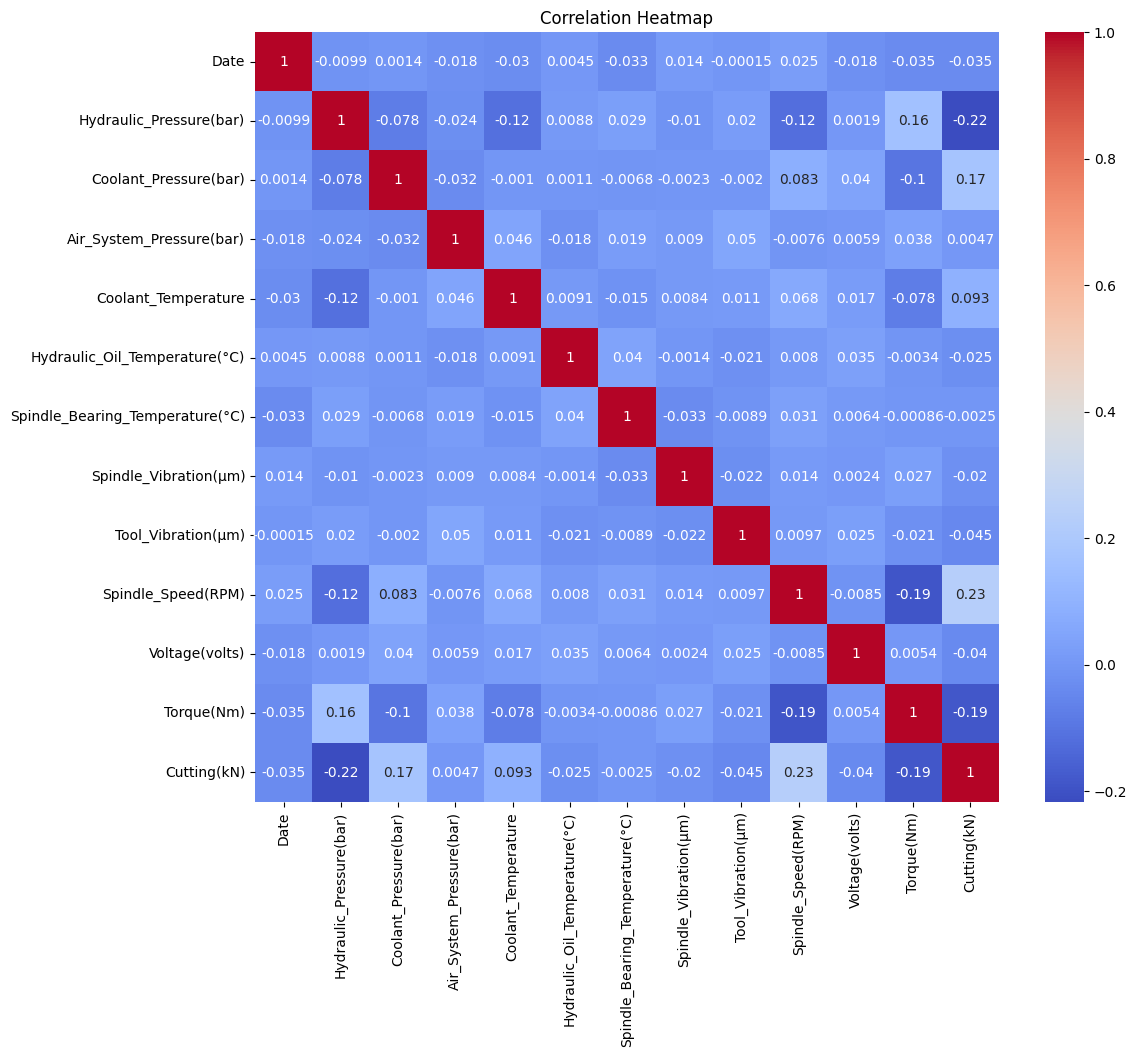

In [53]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_for_heatmap.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()